#IMPORTING LIB

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
from tensorflow.keras import layers

#downloading datasets

In [ ]:
train_ds,info=tfds.load("horses_or_humans",with_info=True,split='train', as_supervised=True)
val_ds,val_info=tfds.load("horses_or_humans",with_info=True,split='test',as_supervised=True)

#TYPE CONVERSION

In [ ]:
Img_name=info.features["label"].int2str

#ITERATING THE IMAGES

In [ ]:
image,label=next(iter(train_ds))

#DISPLAYING IMAGES

Text(0.5, 1.0, 'horses')

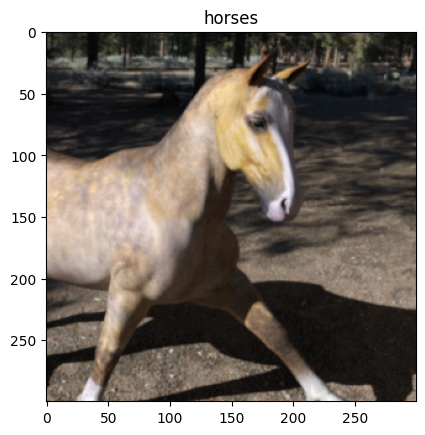

In [ ]:
plt.imshow(image)
plt.title(Img_name(label))

#IMAGE SIZE

In [ ]:
Img_size=150

#RESIZE AND RESCALE

In [ ]:
rnr=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(Img_size,Img_size),layers.experimental.preprocessing.Rescaling(1./255)])

#APPLYING IMAGE

In [ ]:
result=rnr(image)

#DISPLAYING IMAGE

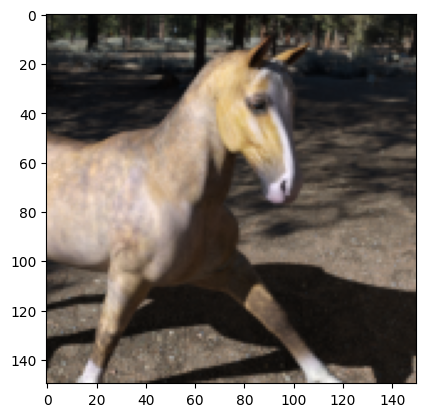

In [ ]:
plt.imshow(result)

In [ ]:
result.shape

TensorShape([150, 150, 3])

#MIN AND MAX PIXEL VALUES

In [ ]:
print("min and max pixels: ",result.numpy().min(),result.numpy().max())

min and max pixels:  0.012745099 0.98921573


#data augmentation

In [ ]:
data_aug=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),layers.experimental.preprocessing.RandomRotation(0.2),])

In [ ]:
image.shape

TensorShape([300, 300, 3])

In [ ]:
#expanding dimension

In [ ]:
image=tf.expand_dims(image,0)
print(image.shape)

(1, 300, 300, 3)


In [ ]:
image.dtype
image.shape

TensorShape([1, 300, 300, 3])

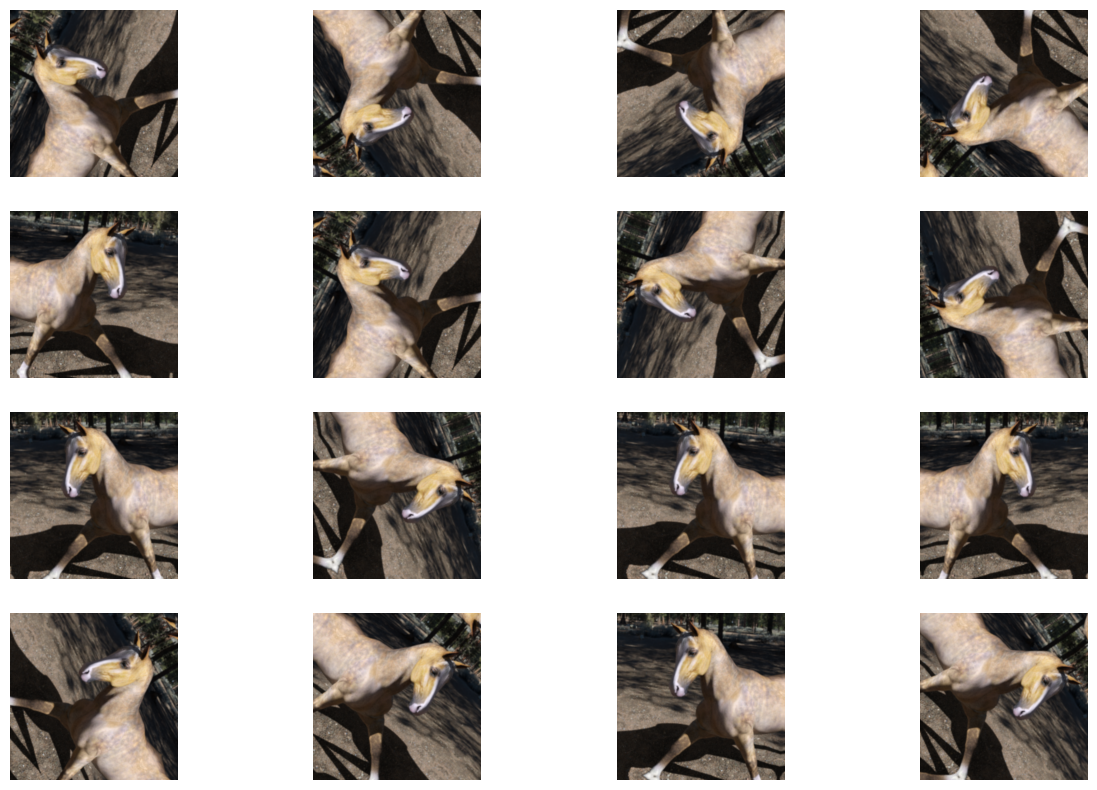

In [ ]:
plt.figure(figsize=(15,10))
for i in range(16):
  aug_img=data_aug(image)
  ax=plt.subplot(4,4,i+1)
  plt.imshow(aug_img[0].numpy().astype('uint8'))
  plt.axis("off")